# Lecture 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [2]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])     # distances of the planets from the Sun
p = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])  # periods
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

sizes = [2, 4, 5, 3, 9, 8, 6, 7, 1]
colors = ['gray','orange','blue','red','pink','yellow','black','blue','cyan']

Plot as points, the periods vs. distances for each planet on a log-log plot.

Write the name of the planet next to the point for that planet on the plot

In [3]:
np.log(248)

5.5134287461649825

(0.3, 75)

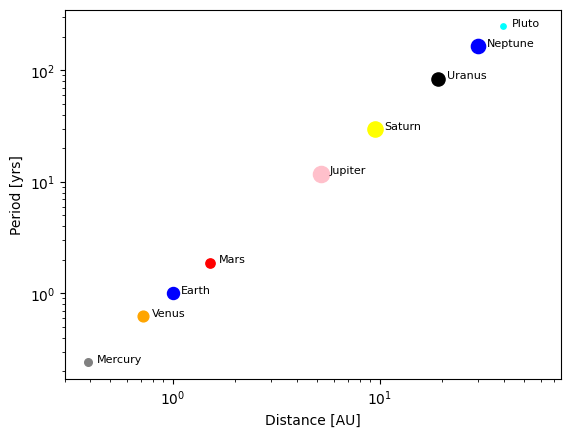

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

for dist, period, name, size, color  in zip(a, p, names, sizes, colors):
    ax.scatter(dist, period, s= size*15, color=color)
    ax.text(dist+ dist/10, period, name, fontsize=8)


ax.set_xlabel(r"Distance [AU]")
ax.set_ylabel(r"Period [yrs]")
ax.loglog()
ax.set_xlim(0.3, 75)

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

In [5]:
theta = np.linspace(0,2.0*np.pi, num=100)
R = 1

x = R * np.cos(theta)
y = R * np.sin(theta)

Text(0, 0.5, 'y')

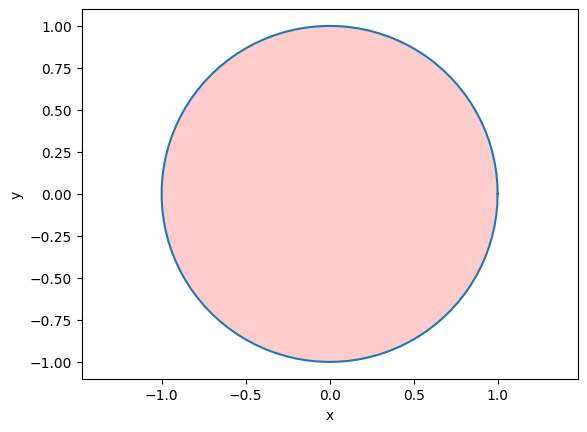

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.fill(x, y, "red", alpha=0.2)

ax.axis("equal") 
ax.set_xlabel("x")
ax.set_ylabel("y")

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

In [7]:
def draw_circle(x0, y0, R, color):
    theta = np.linspace(0,2.0*np.pi, num=100)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for xs, ys, Rs, c in zip(x0, y0, R, color):
        x = xs + Rs * np.cos(theta)
        y = ys + Rs * np.sin(theta)
        ax.plot(x, y, color = c)


    ax.axis("equal") 
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    return 

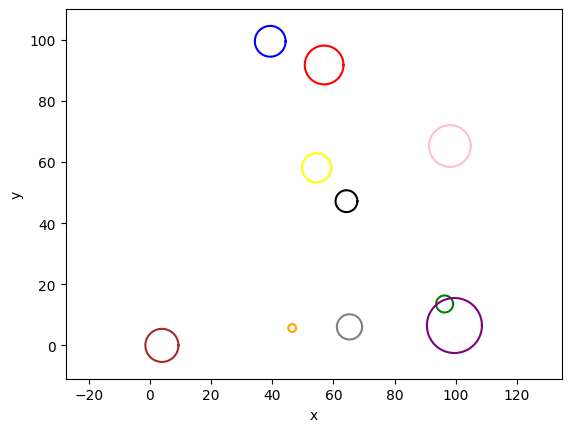

In [8]:
x0 = np.random.uniform(0 , 100, 10)
y0 = np.random.uniform(0 , 100, 10)
R  = np.random.uniform(1 , 10,  10)
color = ['red','orange','yellow','green','blue','purple','black','pink','grey','brown']

draw_circle(x0, y0, R, color)

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

In [9]:
data = np.loadtxt("climate.txt")
year         = data[:,0]
No_Smoothing = data[:,1]
Lowess       = data[:,2]

Text(0, 0.5, 'Smoothed surface air temperature change')

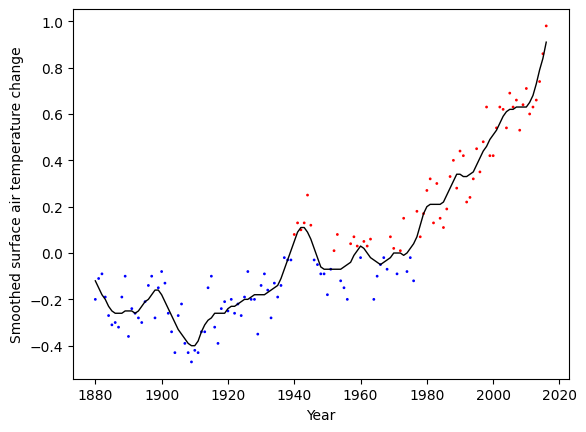

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(year, Lowess,c="black", linewidth=1)

'''
for y,ns in zip(year,No_Smoothing):
    if ns < 0:
        ax.scatter(y, ns, c="blue", s = 1)
    else:
        ax.scatter(y, ns, c="red", s = 1)
'''

color_condition = np.where(No_Smoothing < 0, "blue", "red")

ax.scatter(year, No_Smoothing, c = color_condition, s=1)
ax.set_xlabel("Year")
ax.set_ylabel("Smoothed surface air temperature change")